In [1]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

# Включение русского языка
from matplotlib import rc
rc('font',**{'family':'serif'})
rc('text', usetex=True)
rc('text.latex',unicode=True)
rc('text.latex',preamble='\\usepackage[utf8]{inputenc}')
rc('text.latex',preamble='\\usepackage[russian]{babel}')

In [2]:
dp = 0.5*1e+5
h  = 0.005
L = 10
mu = 1004e-6

r=0.005


<IPython.core.display.Javascript object>


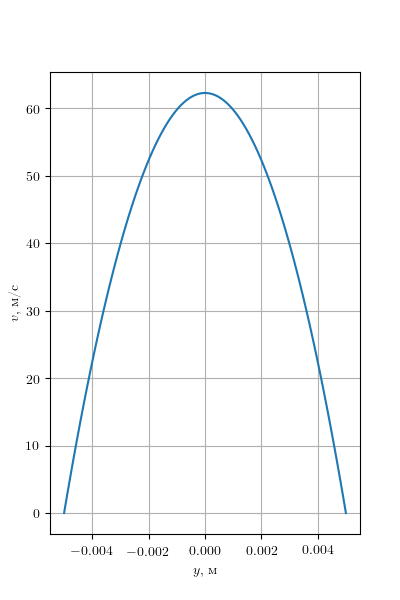

In [3]:
%matplotlib notebook

def v(y):
    return dp/L * h**2/2/mu * (1 - (y/h)**2)


fig, ax = plt.subplots(1,1,figsize=(4,6))

y = np.linspace(-h,h, num=100)

vy = v(y)

ax.plot(y,vy)

ax.grid(True)

ax.set_xlabel("$y$, м")
ax.set_ylabel("$v$, м/с")

plt.savefig("../img/Poiseuille_flat.pdf")

<IPython.core.display.Javascript object>


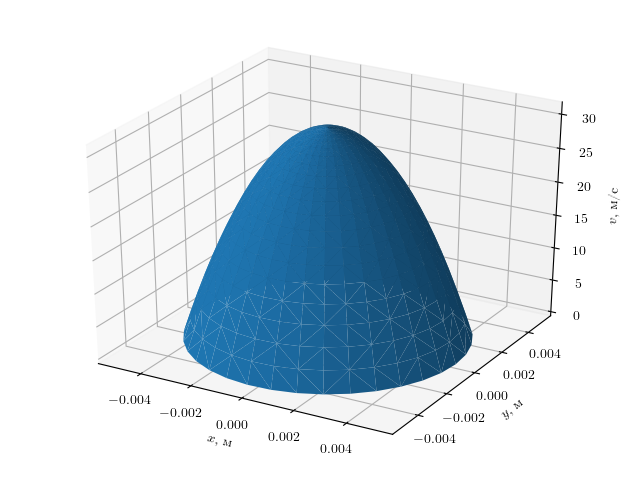

In [7]:
%matplotlib notebook

def vc(x,y):
    return dp/2/L/mu * r**2 /2 * (1-(x/r)**2-(y/r)**2)

ri = np.linspace(r/1000, r, num=20)
thetai = np.linspace(0, 2*np.pi, num=36)


angles = np.repeat(thetai[..., np.newaxis], 20, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.

xi = np.append(0, (ri*np.cos(angles)).flatten())
yi = np.append(0, (ri*np.sin(angles)).flatten())


vxy = vc(xi,yi)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(xi, yi, vxy, linewidth=0.2, antialiased=True)

# ax.grid(True)

ax.set_xlabel("$x$, м")
ax.set_ylabel("$y$, м")

ax.set_zlabel("$v$, м/с")

plt.tight_layout()

plt.savefig("../img/Poiseuille_circle.pdf")